In [1]:
import tensorflow as tf

# Simple Hello world!
ph = tf.constant("Hello")
pw = tf.constant("World")
phw = ph + pw
with tf.Session() as sess:
    ans = sess.run(phw)
print(ans)

b'HelloWorld'


### MNIST 
The MNIST (Mixed National Institute of Standards and Technology) handwritten digits dataset is one of the most researched datasets in image processing and machine learning, and has played an important role in the development of artificial neural networks (now generally referred to as deep learning).

In [ ]:
from tensorflow.examples.tutorials.mnist import input_data
DATA_DIR = '/Data'
NUM_STEPS = 1000
MINIBATCH_SIZE = 100

data = input_data.read_data_sets(DATA_DIR, one_hot=True)

x = tf.placeholder(tf.float32, [None, 784]) # we don't know the number of images so, None is provided 
W = tf.Variable(tf.zeros([784, 10]))

y_true = tf.placeholder(tf.float32, [None, 10])
y_pred = tf.matmul(x, W)

cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_pred, labels=y_true))

gd_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

correct_mask = tf.equal(tf.argmax(y_pred, 1), tf.argmax(y_true, 1))
accuracy = tf.reduce_mean(tf.cast(correct_mask, tf.float32))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    # Train
    for _ in range(NUM_STEPS):
        batch_xs, batch_ys = data.train.next_batch(MINIBATCH_SIZE)
        sess.run(gd_step, feed_dict={x: batch_xs, y_true: batch_ys})
    # Test
    ans = sess.run(accuracy, feed_dict={x: data.test.images, y_true: data.test.labels})
print("Accuracy: {:.4}%".format(ans*100))

A **variable** is an element manipulated by the computation, while a **placeholder** has to be supplied when triggering it. The image itself (x) is a placeholder, because it will be supplied by us when running the computation graph. The size \[None, 784\] means that each image is of size 784 (28×28 pixels unrolled into a single vector), and None is an indicator that we are not currently specifying how many of these images we will use at once

### Advantages of Computational Graph in Tensorflow
Being able to locate dependencies between units of our model allows us to both distribute computations across available resources and avoid performing redundant computations of irrelevant subsets, resulting in a faster and more efficient way of computing things.

### Graphs, Session, Fetches
### Create a Graph
Right after inporting tensorflow as tf. A default tf.Graph() is formed. All the nodes we create are automatically associated
with that default graph. Using the `tf.constant()` operation we will create 6 nodes a, b, c, d, e, f. 

Values 5, 2, and 3 are assigned to the first 3 nodes a, b, and c.
Node d multiplies the outputs of nodes a and b. Node e adds the outputs of nodes b and c. Node f subtracts the output of node e from that of node d.

In [ ]:
## Constants
a = tf.constant(5)
b = tf.constant(2)
c = tf.constant(3)
## Arithmetic Operations
d = tf.multiply(a,b)
e = tf.add(c,b)
f = tf.subtract(d,e)

### Creating a Session - Running it
Once we are done describing the computation graph, we are ready to run the computations that it represents. For this to happen, we need to create and run a session. 

In [ ]:
sess = tf.Session()
outs = sess.run(f)
sess.close()
print(f"out: {outs}")

Here the execution is done with the `run()` method. When called, this method completes one set of computations in our graph in
the following manner: it starts at the requested output(s) and then works backward, computing nodes that must be executed according to the set of dependencies. Therefore, the part of the graph that will be computed depends on our output query

#### Example
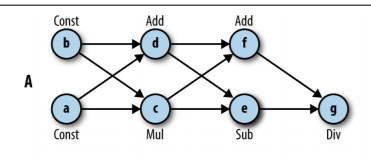

Try converting this into a session in Tensorflow and running it

In [ ]:
## Constants
a = tf.constant(40)
b = tf.constant(1)
## Arithmetic Operations
c = tf.multiply(a, b)
d = tf.add(a, b)
e = tf.subtract(c, d)
f = tf.add(c, d)
g = tf.div(e, f)
## Creating and running a Session
with tf.Session() as sess:
    output = sess.run(g)
print(f"Value of g: {output}")

#### Use of `with` statement
The with statement is used to wrap the execution of a block with methods defined by a context manager—an object that has the special method functions `.__enter__()` to set up a block of code and `.__exit__()` to exit the block
In layman’s terms, it’s very convenient in many cases to execute some code that requires “setting up” of some kind (like opening a file, SQL table, etc.) and then always “tearing it down” at the end, regardless of whether the code ran well or raised any kind of exception. 

### Constructing and Maintaining Graphs
A default graph is defined when tensorflow is imported. However, we can define a new graph using the `tf.Graph()` call

In [ ]:
print(tf.get_default_graph())

g = tf.Graph() 
print(g) # This is a new user defined graph which is empty

Consider constructing a node in the current script. Let it be a constant `a = 5`. Then this value is initialized in the default graph. 

In [ ]:
a = tf.constant(5)

print(f"a in default graph? {a.graph is tf.get_default_graph()}")
print(f"a in graph g? {a.graph is g}")

To make the node inside a graph defined by the user, we use the keyword `with` and the keyword `as_default()` to make the new graph as the default one.

In [ ]:
g1 = tf.get_default_graph()
g2 = tf.Graph()

print(g1 is tf.get_default_graph())

with (g2.as_default()):
    print(g1 is tf.get_default_graph()) # False since, g2 is default
    
print(g1 is tf.get_default_graph()) # True outside, since session with g2 as default is automatically closed after with context

### Fetches
The argument `sess.run()` takes is known as **fetches**. This can be a list of nodes whose output we need to compute. Consider the graph we computed earlier. We can use the list of node names `[a, b, c, d, e, f, g]` to see them in unison. 

In [ ]:
## Constants
a = tf.constant(40)
b = tf.constant(1)
## Arithmetic Operations
c = tf.multiply(a, b)
d = tf.add(a, b)
e = tf.subtract(c, d)
f = tf.add(c, d)
g = tf.div(e, f)

with tf.Session() as sess:
    fetches = [a, b, c, d, e, f, g]
    outs = sess.run(fetches)

print(f"output = {outs}")
print(f"Type of output = {type(outs[0])}")

## Flow of Tensors - Nodes are Operations, Edges are Tensor objects
When we write a tensorflow operation tf.add() for instance, we are creating a tensorflow operation instance. They do not produce any output until the graph is executed or a session is run. 
These handles can be thought of as **Tensorflow objects** and are the places where the 'Tensorflow' originates from. 
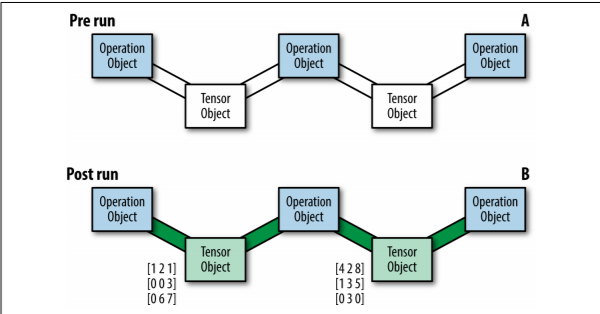

As shown in the image the pre-run and post-run depicts how the graph computation occurs only when the session is run. Until then, the graph is defined with all the nodes and tensor objects. 

### `tf.<operation>` as a constructor, but actually not!

The `tf.<operation>` can be thought of as a constructor, but it's a factory method which defines the node with attributes such as name, shape and type.

In [ ]:
c = tf.constant(5)
print(c) # name - const_22, shape = (), type = int32

### Setting attributes with source operations
Attributes: `name`, `shape`, `dtype`
Source operations: These are used to create the attributes
With these operations we can create scalaes, with the tf.constant() mehtod, as well as arrays and other data types.

#### Data Types
The basic units of data: Numerical, Boolean, String

In [ ]:
c = tf.constant(4.0 , dtype = tf.float64) # Explicit data type declaration
print(f"c with data type {c.dtype}")

In [ ]:
### Casting the datatype
# This is used to keep uniformity in calculating the values in a graph
x = tf.constant([1, 2, 3], name = 'x', dtype = tf.float32)
print(x.dtype)
x = tf.cast(x, tf.int64)
print(x.dtype)

In [ ]:
### Using numpy for m-d arrays
import numpy as np
c = tf.constant([
    [1, 2, 3],
    [2, 3, 4]
])
print(f"Python Matrix Tensor: {c.get_shape()}")

c = tf.constant([
    [
        [1,2,3],
        [2,3,4]
    ],
    [
        [3,4,5],
        [4,5,6]
    ]
])
print(f"Python Matrix Tensor: {c.get_shape()}")

### Interactive tensorflow Sessions
This is created using the `tf.InteractiveSession()`. Using it and the `.eval()` method, we can get a full look at the values without the need to refer the session object. 

In [ ]:
sess = tf.InteractiveSession()
c = tf.linspace(0.0, 4.0, 5)
print(f"The content of c: {c.eval()}")
sess.close()

### Expanding dimensions of matrix
Consider a shape (2,3) matrix A, to be multiplied with a matrix x of shape (3,) but it needs to  be (3,1) for proper multiplication. 

In [ ]:
A = tf.constant([
    [1,2,3],
    [4,5,6]
])
print(f"Shape of A: {A.get_shape()}")

x = tf.constant([1,0,1])
print(f"Shape of x: {x.get_shape()}")

x = tf.expand_dims(x,1)
print(f"Shape of x after expand_dims(): {x.get_shape()}")

b = tf.matmul(A,x)

sess = tf.InteractiveSession()
print(f"Result:\n{b.eval()}")
sess.close()

### Names
Each tf object has an identifiable name. It is an intrinsic string not the name of the variable. As with the dtype, we can use the `.name` attribute  to see the name of the object.

In [ ]:
with tf.Graph().as_default():
    c1 = tf.constant(4, dtype = tf.float64, name='first')
    c2 = tf.constant(5, dtype = tf.float64, name='second')
print(f"c1.name = {c1.name}")
print(f"c2.name = {c2.name}")

The name of the Tensor object is simply the name of its corresponding operation ("first"/"second"; concatenated with a colon), followed by the index of that tensor in the outputs of the operation that produced it

### Name scopes
This is used to handle the large number of nodes in a computational graph by grouping them into various squads. The name scope can be specified using the `tf.name_scope("Name_of_group")` with the `with` statement

In [ ]:
with tf.Graph().as_default():
    c1 = tf.constant(4, dtype=tf.int32, name = 'first')
    # Grouping c2, c3 under Group1
    with tf.name_scope("Group1"):
        c2 = tf.constant(10, dtype=tf.int32, name = 'first')
        c3 = tf.constant(11, dtype=tf.int32, name = 'second')
print(c1.name)
print(c2.name)
print(c3.name)

### Variables, Placeholders and Simple Organizations

#### Variables
They are **refilled** with new values each time we run the session. They can maintain a fixed state in the graph. This is important because their current state might influence how they change in the following iteration. They can be ued as input for other operations. 

- Stage 1: Creation of Variable: 
          
  - `tf.Variable()` 
- Stage 2: Allocation of Memory:  

  - `tf.global_variables_initializer()` which allocates memory for the memory and sets the inital values. 

In [ ]:
# Run it twice, note some change?
init_val = tf.random_normal((1,5), 0, 1)
var = tf.Variable(init_val, name = "var")
print(f"Pre run:\n{var}")

init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    post_var = sess.run(var)
print(f"Post run:\n{post_var}")

When running it twice, we see that a new variable is created. This is inefficient when we want to reuse the model. 

#### Placeholders
This can be used in Tensorflow to feed in the input values. They have an optional shape argument. If shape is not fed or is passed with None, then they can be fed with data of any size. 

The input data is passed to the `session.run()` method as a dictionary, where each key corresponds to a placeholder variable name, and the matching values are the data values given in the form of a list or a NumPy array:

In [ ]:
ph = tf.placeholder(tf.float32,shape=(None,10))

In [ ]:
### Using placeholders in a graph
x_data = np.random.randn(5, 10)
w_data = np.random.randn(10, 1)

with tf.Graph().as_default():
    x = tf.placeholder(tf.float32, shape=(5,10)) # feed it with some input values
    w = tf.placeholder(tf.float32, shape=(10,1)) # feed it with some input values
    b = tf.fill((5,1), -1.)
    xw = tf.matmul(x,w)
    
    xwb = xw + b
    # Compute the max across the columns
    s = tf.reduce_max(xwb)
    with tf.Session() as sess:
        outs = sess.run(s, feed_dict={x: x_data, w: w_data})
    print(f"Output: {outs}")

### Optimization
This is the basics of training a model in Tensorflow. We will be demonstrating a simple linear regression model.

#### Training to predict
We have some target variable *y* which we want to explain using some feature vector *x*. To do so, we first choose a model that relates the two. 


We will need **placeholders** for the input and output data. We will also need **variables** for teh weights and intercept. 

In [ ]:
## Placeholders: Input and Output
x = tf.placeholder(tf.float32, shape=[None, 3])
y_true = tf.placeholder(tf.float32, shape= None)

## Variables: Weights and Intercept
w = tf.Variable([[0,0,0]], dtype=tf.float32, name="weights")
b = tf.Variable(0, dtype = tf.float32, name="bias")

## Model: Multivariate linear regression 
y_pred = tf.matmul(w, tf.transpose(x)) + b # This is also a variable

#### Defining a loss function
##### MSE: Mean square Error 
This is computed using the `tf.square(y_true-y_pred)` and applying the `tf.reduce_mean()`. 

##### Cross Entropy Loss - Similarity between 2 distributions
This is computed using the <br> `tf.nn.sigmoid_cross_entropy_with_logits(labels=y_true, logits=y_pred)` call

In [ ]:
mse_loss = tf.reduce_mean(tf.square(y_true - y_pred))
cross_entropy_loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=y_true, logits=y_pred)
ce_loss = tf.reduce_mean(cross_entropy_loss)

#### Gradient Descent Optimizer
This is a way to minimize the loss. They update the set of weights `w` iteratively in a way that reduces the loss/ time. The most common: **Gradient Descent**. 

SGD : Use small batches of input data: $(50-500)$ per epoch. Using small batches works faster, and the smaller the batch size, the faster are the calculations. However, there is a tradeoff in that small samples lead to hardware optimizations and cause high variations. 

In [ ]:
# Create the optimizer instance
learning_rate = 0.001
optimizer = tf.train.GradientDescentOptimizer(learning_rate)
train = optimizer.minimize(mse_loss)

#### Realtime models to show Tensorflow Usage
##### Example 1. Linear Regression
This is a case where the weights $w$ and bias $b$ are the parameters to be learned. Assume the target value is a linear combination of some input vector $x$, with additional gaussian noise $\epsilon_{i}$ added to each sample

In [ ]:
import matplotlib.pyplot as plt
x_data = np.random.randn(2000,3)
x = np.linspace(0,2,2000)
w_real = [0.3, 0.5, 0.1]
b_real = -0.2

noise = np.random.randn(1, 2000)*0.1
y_data = np.matmul(w_real, x_data.T) + b_real + noise
plt.figure(figsize = (15,5))
plt.scatter(x_data[:,0],y_data, alpha = 0.3, label = 'Linear Curve')
_ = plt.xlabel('$w^Tx+b$')
_ = plt.ylabel('$y$')

In [ ]:
NUM_STEPS = 10

g = tf.Graph()
wb_ = []
with g.as_default():
    x = tf.placeholder(tf.float32, shape = [None, 3])
    y_true = tf.placeholder(tf.float32, shape = None)
    
    with tf.name_scope('inference') as scope:
        w = tf.Variable([[0,0,0]], dtype = tf.float32, name='weights')
        b = tf.Variable(0, dtype = tf.float32, name = 'bias')
        y_pred = tf.matmul(w, tf.transpose(x)) + b
    
    with tf.name_scope('loss') as scope:
        loss = tf.reduce_mean(tf.square(y_true-y_pred))
        
    with tf.name_scope('train') as scope:
        learning_rate = 0.5
        optimizer = tf.train.GradientDescentOptimizer(learning_rate)
        train = optimizer.minimize(loss)
        
    init = tf.global_variables_initializer()
    with tf.Session() as sess:
        sess.run(init)
        for step in range(NUM_STEPS):
            sess.run(train,{x: x_data, y_true: y_data})
            if (step % 5 == 0):
                print(step, sess.run([w,b]))
                print('\n')
                wb_.append(sess.run([w,b]))
        print(10, sess.run([w,b]))

After 10 iterations the estimated weights and bias are $w = [0.299, 0.49, 0.1 ]$ and $b = -0.19$ which are close to the original values!